## Experiment using SiNDY

In [1]:
# load in data, train on London set
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

#csv data
dat=pd.read_csv("paperstudy_without gains_0.2m_0.72k_hourly_cropped.csv").to_numpy()


#training cutoff after 2/3rds of time series 
train_idx=int(0.67*len(dat))

# first column of x is the forcing
x=dat[:train_idx-1,1:] # all 
u = x[:,0]
x = x[:,1:]
print(np.shape(x))

(5868, 2)


## first experiment: fit Vanilla Sindy

In [2]:
import pysindy as ps
from pysindy.optimizers import STLSQ
import matplotlib.pyplot as plt

dt =1 # hourly steps
xdot = np.gradient(x, dt, axis=0)

optimizer = STLSQ(threshold=0.01)  # Try smaller value

# Define SINDy model with forcing
feature_library = ps.PolynomialLibrary(include_interaction=True, degree=2)
model = ps.SINDy(feature_library=feature_library, optimizer = optimizer, discrete_time=True)

model.fit(x, u=u, t=dt)#, x_dot=xdot)
model.print()

# simulate for test data
print('simulation')
x_pred = model.simulate(x0 = dat[train_idx,2:], u = dat[train_idx:, 1], t=len(dat[train_idx:,1]))

print('London T1 error: ' + str(np.mean((x_pred[:,0] - dat[train_idx:,2])**2)))
print('London T2 error: ' + str(np.mean((x_pred[:,1] - dat[train_idx:,3])**2)))

(x0)[k+1] = 0.969 x0[k] + 0.030 u0[k]
(x1)[k+1] = 0.181 x0[k] + 0.380 x1[k] + 0.440 u0[k] + 0.015 x0[k]^2 + -0.074 x0[k] x1[k] + 0.051 x0[k] u0[k] + 0.093 x1[k]^2 + -0.127 x1[k] u0[k] + 0.042 u0[k]^2
simulation
London T1 error: 0.3512239249036481
London T2 error: 0.08506231023143629


Text(0.5, 1.0, 'Running over test set')

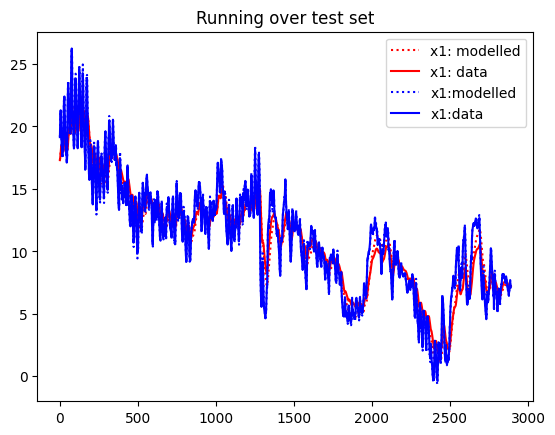

In [3]:
plt.figure()
plt.plot(x_pred[:,0], ':r', label = 'x1: modelled')
plt.plot( dat[train_idx:,2], 'r', label = 'x1: data')

plt.plot(x_pred[:,1], ':b', label = 'x1:modelled')
plt.plot( dat[train_idx:,3], 'b', label = 'x1:data')
plt.legend()
plt.title('Running over test set')

Text(0.5, 1.0, 'Running over training set')

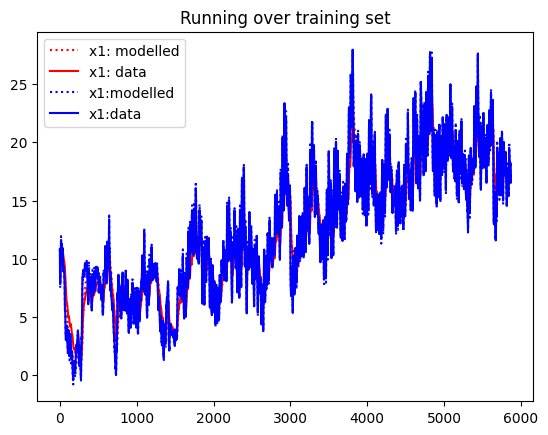

In [4]:
x_pred_train = model.simulate(x0 = dat[0,2:], u = dat[:train_idx, 1], t=len(dat[:train_idx,1]))

plt.figure()
plt.plot(x_pred_train[:,0], ':r', label = 'x1: modelled')
plt.plot( dat[:train_idx,2], 'r', label = 'x1: data')

plt.plot(x_pred_train[:,1], ':b', label = 'x1:modelled')
plt.plot( dat[:train_idx,3], 'b', label = 'x1:data')
plt.legend()
plt.title('Running over training set')

## Apply to Chicago data

chicago T1 error: 49.35134262726917
chicago T2 error: 62.9095348819484


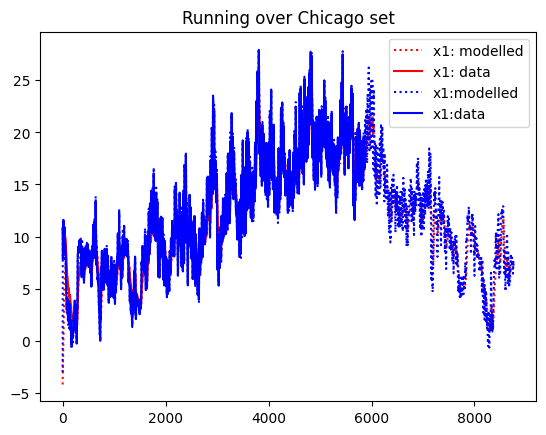

In [5]:
dat_chicago=pd.read_csv("without gains_hourly_chicago_cropped.csv").to_numpy()
x_pred_chicago = model.simulate(x0 = dat_chicago[0,2:], u = dat[:, 1], t=len(dat))

plt.figure()
plt.plot(x_pred_chicago[:,0], ':r', label = 'x1: modelled')
plt.plot( dat[:train_idx,2], 'r', label = 'x1: data')

plt.plot(x_pred_chicago[:,1], ':b', label = 'x1:modelled')
plt.plot( dat[:train_idx,3], 'b', label = 'x1:data')
plt.legend()
plt.title('Running over Chicago set')

print('chicago T1 error: ' + str(np.mean((x_pred_chicago[:,0] - dat_chicago[:,2])**2)))
print('chicago T2 error: ' + str(np.mean((x_pred_chicago[:,1] - dat_chicago[:,3])**2)))